In [1]:
import networkx as nx
import osmnx as ox

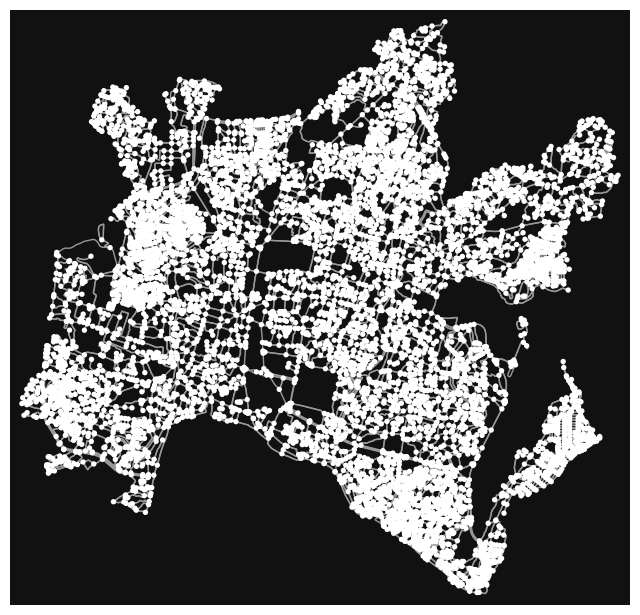

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
#dowloading a street network of some city for visualization
city = ox.graph.graph_from_place("Kathmandu, Nepal", network_type="drive")
ox.plot_graph(city)

In [5]:
#converting the graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges =ox.convert.graph_to_gdfs(city)
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
31019057,27.720438,85.363963,3,NaN,POINT (85.36396 27.72044)
31019141,27.707059,85.314224,4,NaN,POINT (85.31422 27.70706)
31019147,27.708709,85.314871,3,NaN,POINT (85.31487 27.70871)
31019262,27.707492,85.312253,5,NaN,POINT (85.31225 27.70749)
31019450,27.713212,85.317892,3,NaN,POINT (85.31789 27.71321)


In [6]:
gdf_edges.head()

osmid lanes  ref  \
u        v          key                                                 
31019057 2169068697 0                            171603743     3  F26   
         724349918  0                            171603743     3  F26   
         5622458522 0    [588729673, 588729674, 588729675]   NaN  NaN   
31019141 2126598729 0                              4825630     2  NaN   
         1918201219 0                            218316959   NaN  NaN   

                                             name      highway width  oneway  \
u        v          key                                                        
31019057 2169068697 0    चाबहिल-बौद्ध-जोरपाटी सडक      primary    14   False   
         724349918  0    चाबहिल-बौद्ध-जोरपाटी सडक      primary    14   False   
         5622458522 0                         NaN  residential   NaN   False   
31019141 2126598729 0                   कान्ति पथ      primary    14    True   
         1918201219 0              Siddhidas Marg  residential   NaN   False   

                        reversed   length  \
u        v          key                     
31019057 2169068697 0       True   46.559   
         724349918  0      False  187.325   
         5622458522 0      False  136.057   
31019141 2126598729 0      False  159.451   
         1918201219 0      False   93.821   

                                                                  geometry  \
u        v          key                                                      
31019057 2169068697 0    LINESTRING (85.36396 27.72044, 85.36443 27.72050)   
         724349918  0    LINESTRING (85.36396 27.72044, 85.36344 27.720...   
         5622458522 0    LINESTRING (85.36396 27.72044, 85.36410 27.721...   
31019141 2126598729 0    LINESTRING (85.31422 27.70706, 85.31429 27.707...   
         1918201219 0    LINESTRING (85.31422 27.70706, 85.31403 27.707...   

                        bridge maxspeed access junction tunnel  
u        v          key                                         
31019057 2169068697 0      NaN      NaN    NaN      NaN    NaN  
         724349918  0      NaN      NaN    NaN      NaN    NaN  
         5622458522 0      NaN      NaN    NaN      NaN    NaN  
31019141 2126598729 0      NaN      NaN    NaN      NaN    NaN  
         1918201219 0      NaN      NaN    NaN      NaN    NaN

In [8]:
#ox.settings.bidirectional_network_types += "drive"
#city = ox.graph.graph_from_place("Kathmandu, Nepal", network_type = "drive")

In [11]:
#finding the area covered by the street network in square meters
city_proj = ox.projection.project_graph(city)
nodes_proj = ox.convert.graph_to_gdfs(city_proj, edges = False)
graph_area_m = nodes_proj.geometry.unary_union.convex_hull.area
print("The area covered by the street network is", int(graph_area_m), "square meters")

The area covered by the street network is 64074181 square meters


In [12]:
city = ox.routing.add_edge_speeds(city)
city = ox.routing.add_edge_travel_times(city)

In [13]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(city, Y=27.7093954, X=85.3000027)
dest = ox.distance.nearest_nodes(city, Y=27.722426, X=85.346818)

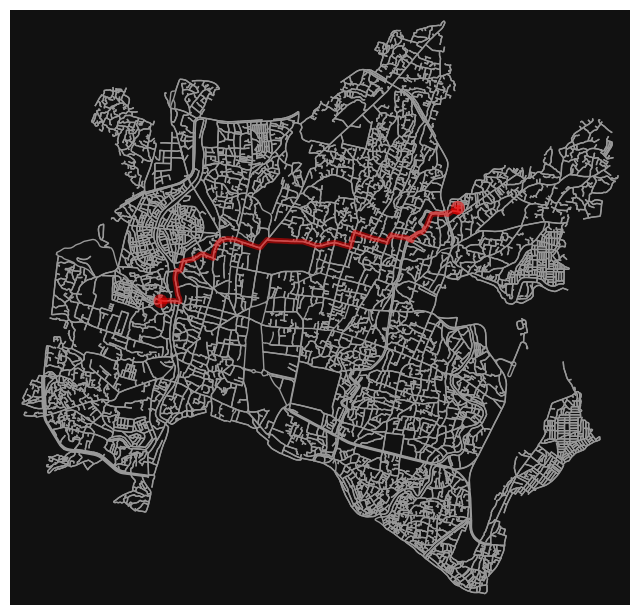

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
#finding the shortest path between the two nodes
route = ox.routing.shortest_path(city, orig, dest, weight= "travel_time")
ox.plot.plot_graph_route(city, route, node_size = 0)

In [15]:
#length of the route in meters
edge_lengths = ox.routing.route_to_gdf(city,route)["length"]
round(sum(edge_lengths))

6279

In [16]:
#distance between two nodes as the crow flies
orig_x = city.nodes[orig]["x"]
orig_y = city.nodes[orig]["y"]
dest_x = city.nodes[dest]["x"]
dest_y = city.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y,orig_x, dest_y, dest_x))


4885